# IMDB Rating Webscrapping using BeautifulSoup

Tujuan capstone project ini adalah mendapatkan data yg diinginkan dari web IMDB. Data yg diinginkan adalah list film yang ditampilkan pada halaman web dan variabel yg mengikutinya. Variabel tsb antara lain : Judul film, Genres, Rating, Metascore dan Total Votes


import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [121]:
url_get.content[1:777]

b'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [122]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 1045 character. 

In [123]:
print(soup.prettify()[:1045])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'functi

Karena, data yg diinginkan berada di dalam class `lister-item mode-advanced` maka dimasukkan dalam atribut

In [148]:
film = soup.find('div', attrs={'class':'lister-item mode-advanced'})
print(film.prettify()[1:4444])

div class="lister-item mode-advanced">
 <div class="lister-top-right">
  <div class="ribbonize" data-caller="filmosearch" data-tconst="tt1312171">
  </div>
 </div>
 <div class="lister-item-image float-left">
  <a href="/title/tt1312171/">
   <img alt="The Umbrella Academy" class="loadlate" data-tconst="tt1312171" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BNzA5MjkwYzMtNGY2MS00YWRjLThkNTktOTNmMzdlZjE3Y2IxXkEyXkFqcGdeQXVyMjkwMzMxODg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
  </a>
 </div>
 <div class="lister-item-content">
  <h3 class="lister-item-header">
   <span class="lister-item-index unbold text-primary">
    1.
   </span>
   <a href="/title/tt1312171/">
    The Umbrella Academy
   </a>
   <span class="lister-item-year text-muted unbold">
    (2019– )
   </span>
  </h3>
  <p class="text-muted">
   <span class="runtime">
    60 min
   </span>
   <span class="

Variabel yg ingin di di-scrap- pada web tersebut sbb:

- Title movie
- Genre
- IMDB Rating
- Total Votes
- Film description

# Data Scrapping

In [125]:
#find movie title
movie_title = []
for title in soup.findAll('h3', {'class':'lister-item-header'}):
    titles = title.find('a', href = True).get_text()
    movie_title.append(titles)
movie_title

['The Umbrella Academy',
 'The Boys',
 'Knives Out',
 'Watchmen',
 'Euphoria',
 'In the Dark',
 'Doom Patrol',
 'For All Mankind',
 'The Mandalorian',
 'The Gentlemen',
 'Hanna',
 'The Witcher',
 'Once Upon a Time... in Hollywood',
 'Yes, God, Yes',
 'His Dark Materials',
 'Joker',
 'Gisaengchung',
 'After',
 'Motherless Brooklyn',
 'Avengers: Endgame',
 'Ford v Ferrari',
 'What We Do in the Shadows',
 'How to Sell Drugs Online (Fast)',
 'The Morning Show',
 'Doctor Sleep',
 'Midway',
 'Midsommar',
 "Charlie's Angels",
 '1917',
 'Koma',
 'Dead to Me',
 'Chhichhore',
 'Radioactive',
 'Little Women',
 'Chernobyl',
 'Uncut Gems',
 'Sex Education',
 'Vivarium',
 'Star Wars: Episode IX - The Rise of Skywalker',
 'Prodigal Son',
 'Jumanji: The Next Level',
 'The Order',
 'Terminator: Dark Fate',
 'Ad Astra',
 'Jojo Rabbit',
 'It Chapter Two',
 'Yip Man 4',
 'The Irishman',
 'Reckoning',
 'Ready or Not']

In [126]:
#genre
genre_list = []
for genre in soup.findAll('span', attrs= {'class':'genre'}):
    genre = genre.get_text()
    genre_list.append(genre.strip())
genre_list

['Action, Adventure, Comedy',
 'Action, Comedy, Crime',
 'Comedy, Crime, Drama',
 'Action, Drama, Mystery',
 'Drama',
 'Comedy, Crime, Drama',
 'Action, Adventure, Comedy',
 'Drama, Sci-Fi',
 'Action, Adventure, Sci-Fi',
 'Action, Comedy, Crime',
 'Action, Drama',
 'Action, Adventure, Fantasy',
 'Comedy, Drama',
 'Comedy, Drama',
 'Adventure, Drama, Family',
 'Crime, Drama, Thriller',
 'Comedy, Drama, Thriller',
 'Drama, Romance',
 'Crime, Drama, Mystery',
 'Action, Adventure, Drama',
 'Action, Biography, Drama',
 'Comedy, Fantasy, Horror',
 'Comedy, Crime, Drama',
 'Drama',
 'Drama, Fantasy, Horror',
 'Action, Adventure, Drama',
 'Drama, Horror, Mystery',
 'Action, Adventure, Comedy',
 'Drama, War',
 'Action, Adventure, Fantasy',
 'Comedy, Drama',
 'Comedy, Drama',
 'Biography, Drama, Romance',
 'Drama, Romance',
 'Drama, History, Thriller',
 'Crime, Drama, Thriller',
 'Comedy, Drama',
 'Comedy, Horror, Mystery',
 'Action, Adventure, Fantasy',
 'Crime, Drama, Mystery',
 'Action, Adven

In [176]:
#IMDB Rating
imdb_rating = []
for rating in soup.findAll('div', {'class':'ratings-bar'}):
    rating = rating.find('strong').get_text()
    imdb_rating.append(rating)
imdb_rating


['8.0',
 '8.7',
 '7.9',
 '8.1',
 '8.3',
 '7.4',
 '8.0',
 '7.5',
 '8.7',
 '7.9',
 '7.5',
 '8.2',
 '7.7',
 '5.9',
 '7.9',
 '8.5',
 '8.6',
 '5.4',
 '6.8',
 '8.4',
 '8.1',
 '8.5',
 '7.9',
 '8.4',
 '7.4',
 '6.7',
 '7.1',
 '4.7',
 '8.3',
 '6.3',
 '8.0',
 '8.2',
 '6.1',
 '7.9',
 '9.4',
 '7.4',
 '8.3',
 '5.8',
 '6.6',
 '7.7',
 '6.7',
 '6.8',
 '6.2',
 '6.6',
 '7.9',
 '6.6',
 '7.1',
 '7.9',
 '6.6',
 '6.8']

In [155]:
#total votes
total_votes = []
movie_div = soup.find_all('div', class_='lister-item mode-advanced')

for vote in movie_div:
        nv = vote.find_all('span', attrs={'name': 'nv'})
        vote = nv[0].text
        total_votes.append(vote)
        
total_votes

['112,193',
 '156,895',
 '360,378',
 '74,534',
 '44,539',
 '4,869',
 '28,402',
 '9,448',
 '181,924',
 '170,125',
 '22,515',
 '264,120',
 '498,350',
 '1,846',
 '36,690',
 '837,670',
 '457,624',
 '29,668',
 '33,265',
 '745,913',
 '243,553',
 '28,699',
 '15,361',
 '39,323',
 '116,344',
 '54,874',
 '171,389',
 '47,157',
 '352,477',
 '3,549',
 '47,846',
 '27,350',
 '3,295',
 '118,391',
 '485,787',
 '194,093',
 '139,465',
 '26,043',
 '342,891',
 '9,431',
 '162,446',
 '17,427',
 '129,483',
 '181,774',
 '243,090',
 '189,036',
 '19,636',
 '301,037',
 '2,183',
 '92,338']

In [233]:
metascores = []

for meta in movie_div:
        m_score = meta.find('span', class_='metascore').text if meta.find('span', class_='metascore') else '-'
        metascores.append(m_score)
metascores

['-',
 '-',
 '82        ',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '51        ',
 '-',
 '-',
 '83        ',
 '71        ',
 '-',
 '59        ',
 '96        ',
 '30        ',
 '60        ',
 '78        ',
 '81        ',
 '-',
 '-',
 '-',
 '59        ',
 '47        ',
 '72        ',
 '52        ',
 '78        ',
 '-',
 '-',
 '-',
 '56        ',
 '91        ',
 '-',
 '90        ',
 '-',
 '64        ',
 '53        ',
 '-',
 '58        ',
 '-',
 '54        ',
 '80        ',
 '58        ',
 '58        ',
 '62        ',
 '94        ',
 '-',
 '64        ']

Setelah semua variabel yg diinginkan telah kita dapatkan. Maka selanjutnya di assign ke dalam sebuah dataframe

In [253]:
import pandas as pd

df = pd.DataFrame({
    'Movie': movie_title,
    'Genre': genre_list,
    'IMDB_Rating': imdb_rating,
    'Votes': total_votes,
    'Metascores' : metascores
})
df.tail()

,Movie,Genre,IMDB_Rating,Votes,Metascores
45,It Chapter Two,"Drama, Fantasy, Horror",6.6,"189,036",58
46,Yip Man 4,"Action, Biography, Drama",7.1,"19,636",62
47,The Irishman,"Biography, Crime, Drama",7.9,"301,037",94
48,Reckoning,Thriller,6.6,"2,183",-
49,Ready or Not,"Comedy, Horror, Mystery",6.8,"92,338",64



# Data Pre-Processing

Pada proses dibawah akan dilakukan perubahan data type dan menghilangkan ',' pada value kolom Votes

In [239]:
df.dtypes

Movie          object
Genre          object
IMDB_Rating    object
Votes          object
Metascores     object
dtype: object

In [240]:
df['IMDB_Rating'] = df['IMDB_Rating'].astype('float')

In [241]:
def remove_str(votes):
    for r in ((',',''), ('(',''),(')','')):
        votes = votes.replace(*r)
        
    return votes

In [242]:
df['Votes'] = df.Votes.apply(remove_str).astype(int)

df.head()

,Movie,Genre,IMDB_Rating,Votes,Metascores
0,The Umbrella Academy,"Action, Adventure, Comedy",8.0,112193,-
1,The Boys,"Action, Comedy, Crime",8.7,156895,-
2,Knives Out,"Comedy, Crime, Drama",7.9,360378,82
3,Watchmen,"Action, Drama, Mystery",8.1,74534,-
4,Euphoria,Drama,8.3,44539,-


In [247]:
df['Votes'] = df['Votes'].astype('int64')

In [248]:
df.dtypes

Movie           object
Genre           object
IMDB_Rating    float64
Votes            int64
Metascores      object
dtype: object

# Data Visualization

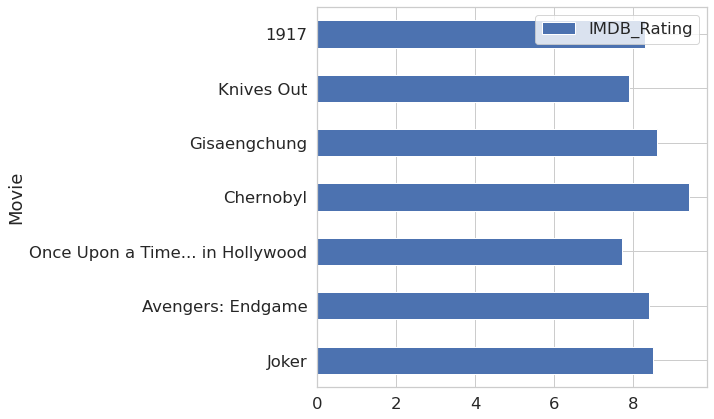

In [251]:
#Plot 7 film popular di tahun 2019

df_popular = df.sort_values('Votes', ascending= False).head(7)
df_popular.plot.barh(y='IMDB_Rating', x='Movie', figsize=(7,7))

In [252]:
df_popular

,Movie,Genre,IMDB_Rating,Votes,Metascores
15,Joker,"Crime, Drama, Thriller",8.5,837670,59
19,Avengers: Endgame,"Action, Adventure, Drama",8.4,745913,78
12,Once Upon a Time... in Hollywood,"Comedy, Drama",7.7,498350,83
34,Chernobyl,"Drama, History, Thriller",9.4,485787,-
16,Gisaengchung,"Comedy, Drama, Thriller",8.6,457624,96
2,Knives Out,"Comedy, Crime, Drama",7.9,360378,82
28,1917,"Drama, War",8.3,352477,78


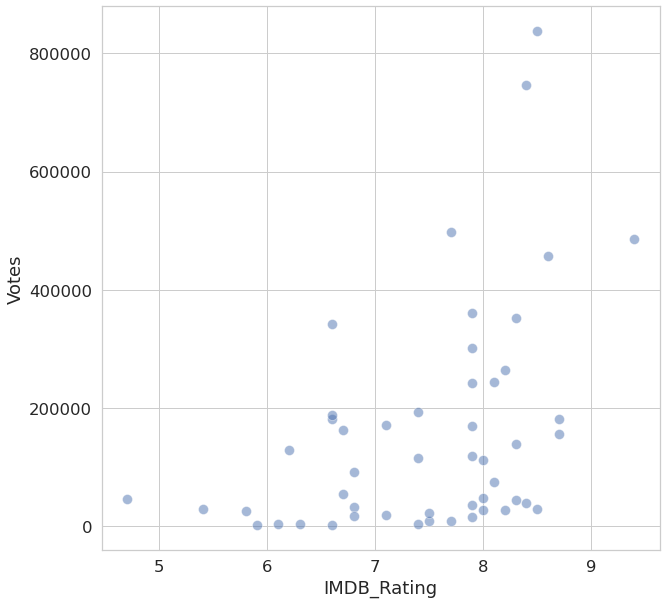

In [250]:
#Plot Korelasi antara Jumlah Votes dengan Nilai Rating

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5,font='Rubik',style='whitegrid')
plt.figure(figsize=(10,10))
sns.scatterplot(df.IMDB_Rating,df.Votes,alpha=0.5,s=100)

Put your analysis and conclusion here. 

then put your flask dashboard link here too.